In [68]:
import pandas as pd

In [69]:
arg_20 = pd.read_csv('../data/ArgKB_20.csv')
arg_20

,Input.Stance,Input.Claim,Input.Tagme_concepts,Input.Babelfy_concepts,Answer.rel,Answer.concept_1,Answer.concept1.entities,Answer.effect,Answer.concept_2,Answer.concept2.entities,Answer.GoodBad,Answer.concept_3
0,for,"By legalizing drugs, the state can regulate th...","{'regulation', 'state (polity)', 'recreational...",{'drug'},Relation,legalizing drugs,legalization|drug,positive,state can regulate the sale,state (polity)|regulation,good,"citizens, public health, state, government, pu..."
1,against,"Despite promising developments, it is unrealis...","{'future', 'expectation (epistemic)'}","{'future', 'contempt', 'iraq', 'exploitation'}",NoRelation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,for,Fair Use provides sufficient protection to cop...,"{'fair use', 'protectionism'}","{'fair use', 'tax revenue'}",Relation,fair use,fair use,positive,protection to copyright-holders to generate si...,protectionism|tax revenue,good,"copyright holders, tax payers, copyright holders"
3,against,We have to look at there evidence of times tha...,set(),"{'evidence', 'time'}",NoRelation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,against,Difficulties in defining Fair Use leads to was...,{'fair use'},{'fair use'},Relation,difficulties in defining fair use,fair use,positive,court-battles,fair use,bad,"courts, companies, courts, users, courts, comp..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4735,for,Tourism increases income to a particular area ...,"{'income', 'tourism'}","{'area', 'tourism', 'administrative divisions ...",Relation,tourism,tourism,positive,income to a particular area or country,income|area,good,"national economy, employees, area, economy, ar..."
4736,against,Many hotels are part of large international ch...,{'labour party (uk)'},"{'proletariat', 'chain', 'hotel'}",NoRelation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4737,against,Tourism demands that an area conform to a cert...,"{'local government', 'modernization theory', '...","{'mental image', 'development economics', 'tou...",Relation,tourism demands,tourism,negative,modernisation or inhabitants,development economics|culture|economic develop...,bad,"travel, economy, world connection, society, cu..."
4738,for,Geographically separating tourism related buil...,{'tourism'},"{'building', 'tourism', 'conservation (cultura...",Relation,geographically separating tourism related buil...,building|tourism|geography,positive,conservation,conservation (cultural heritage),good,"cultural heritage, society, city, economy, tou..."


In [70]:
len(arg_20)

4740

In [71]:
import json

arg_20_ = []

for idx, row in arg_20.iterrows():
    arg_20_.append({
        "claim": row["Input.Claim"],
        "stance": row["Input.Stance"],
        "claim_concepts": row["Input.Tagme_concepts"],
        "claim_concepts_": row["Input.Babelfy_concepts"],
        "answer_relation": row["Answer.rel"],
        "answer_concepts": row["Answer.concept_1"],
        "answer_entities": row["Answer.concept2.entities"],
        "answer_effect": row["Answer.effect"],
        "answer_2_concepts": row["Answer.concept_2"],
        "answer_3_concepts": row["Answer.concept_3"],
        "answer_good_bad": row["Answer.GoodBad"]
    })

with open("../data/argKB_20.jsonl", "w", encoding='utf-8') as f:
    for i in arg_20_:
        f.write(json.dumps(i))
        f.write("\n")

In [72]:
import networkx as nx

G = nx.Graph()

arg_20_ = arg_20[["Answer.concept_1", "Answer.concept_2"]][0:20]
G = nx.from_pandas_edgelist(arg_20_, "Answer.concept_1", "Answer.concept_2")

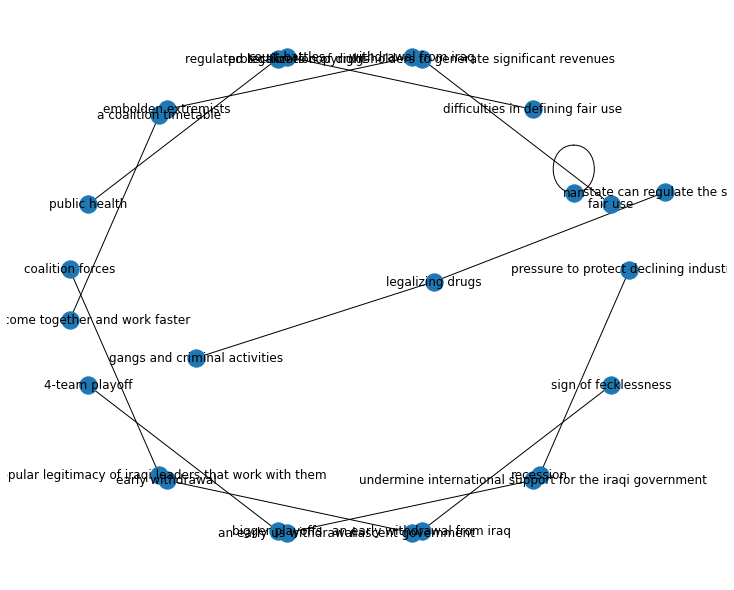

In [73]:
from matplotlib.pyplot import figure

figure(figsize=(10,8))
nx.draw_kamada_kawai(G, with_labels=True)

In [74]:
arg_concepts = arg_20["Answer.concept_3"]
arg20_concepts = []

for i in arg_concepts:
    if pd.isna(i):
        continue

    else:
        for j in i.split(","):
            arg20_concepts.append(str(j.strip()))

len(arg20_concepts)
arg20_concepts

['citizens',
 'public health',
 'state',
 'government',
 'public safety',
 'taxes',
 'budgets',
 'sales',
 'copyright holders',
 'tax payers',
 'copyright holders',
 'courts',
 'companies',
 'courts',
 'users',
 'courts',
 'companies',
 'iraqis',
 'moderates',
 'most of the population',
 'moderates',
 'public health',
 'society',
 'individuals',
 'society',
 'the general public',
 'society',
 'public',
 'citizens',
 'iraqi leaders',
 'the iraqi leaders',
 'iraqi leaders',
 'iraqi government and citizens',
 'iraq',
 'iraqi government',
 'iraqi government',
 'iraqis',
 'the world',
 'iraqi government',
 'iraq',
 'us',
 'enemies of the us',
 'image of the us',
 'network owners',
 'customers',
 'network owners',
 'network owners',
 'network owners',
 'us allies',
 'us citizens',
 'us government',
 'worsened moral credibility is bad for other countries in judging the actions of the united states.  allies may frown upon the us and have a less trusting relationship.',
 'the united states',
 '

In [79]:
concepts_ = set()

for i in arg20_concepts:
    if i == "":
        continue
    else:
        concepts_.add(i)

concepts_

{'us gdp',
 'democratic governments',
 'sexuality',
 'road safety',
 'people who buy food',
 'those not wearing burqas',
 'budget',
 'war',
 'co2 emissions',
 'unity',
 'tibetans',
 'owners',
 'prospective victims of crime',
 'people joining the military',
 'medicine',
 'institution of marriage',
 'doctors',
 'israelites',
 'united states economy',
 'fosters hate groups',
 'development',
 'friendliness',
 'management graduates',
 'preserve addiction',
 'gay people',
 'air traffic',
 'hygiene',
 'skin bridge caused by circumcision',
 'workforce',
 'less over-drinking',
 'the liver',
 'pornography watchers',
 'people living in houses',
 'political stability.',
 'turkey and the world',
 'pets',
 'people of jerusalem',
 'preserve traditions',
 'the troops',
 'food affordability for low income population',
 'the world',
 'criminal convictions',
 'gm foods',
 'residents of new orleans',
 'judges',
 'marginalized people',
 'innacurate conclusions',
 'renewable energy is something that should 

In [77]:
topics = arg_20["Answer.concept_1"]
arg20_topics = []

for i in topics:
    if pd.isna(i):
        continue

    else:
        for j in i.split(","):
            arg20_topics.append(str(j.strip()))

len(arg20_topics)
arg20_topics

['legalizing drugs',
 'fair use',
 'difficulties in defining fair use',
 'withdrawal from iraq',
 'regulated legalization of drugs',
 'a coalition timetable',
 'legalizing drugs',
 'coalition forces',
 '4-team playoff',
 'early withdrawal',
 'an early us withdrawal',
 'an early withdrawal from iraq',
 'recession',
 'early withdrawal from iraq',
 'net neutrality',
 'succeeding in iraq',
 'net neutrality',
 'torturous and brutal tactics in iraq',
 'net neutrality',
 'developing economies',
 'net neutrality',
 'us has accomplished its limited strategic objectives in',
 'insufficient broadband market choice',
 'premature us withdrawal',
 'withdrawing from iraq',
 'markets',
 'the longer the us stays in iraq',
 'existing laws',
 'from iraq',
 'withdrawing',
 'net neutrality',
 'enhanced interrogations',
 'enhanced interrogation techniques',
 'early withdrawal',
 'withdrawing from iraq',
 'early withdrawal from iraq',
 'hasty withdrawal from iraq',
 'enhanced interrogations',
 'an early with

In [86]:
arg20_topics_ = set()

for i in arg20_topics:
    if i == "":
        continue
    else:
        arg20_topics_.add(i)

len(arg20_topics_)
list(arg20_topics_)

# write Argument Topics
#with open()

['kangaroo shootings',
 'banning trans fats',
 'early us exit',
 'such legal powers',
 '"one child" policies',
 '700 mile fence',
 'population differences',
 'eu environmental regulations',
 'enforcing calorie counts laws',
 'partitioning of iraq',
 'chinas three gorges dam',
 'the right to bear arms',
 'unlabelled gm foods',
 'arming the police',
 'muslims hide opposition to veil ban',
 'ban on veal farming',
 'a coalition timetable',
 'price tag',
 'gameplay among youth has increased',
 'charter schools',
 'employer access to social networking sites',
 'anonymity',
 'cameras',
 'use of gm crops',
 'early exposure to work',
 'mandating military service',
 'geoengineering solutions',
 'hurricanes',
 'horns may be shaved',
 '2010 us bank tax',
 'united states withdraws',
 'tolerance of head scarves',
 'higher minimum wages for americans',
 'limited resources',
 'intellectual property',
 'supreme court ruling',
 'trying to regulate children',
 'coffee',
 'carbon tax market',
 'performing

In [87]:
# Semantic Clustering
import time
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

corpus_sentences = list(arg20_topics_)
corpus_embeddings = model.encode(corpus_sentences, batch_size=64, show_progress_bar=True, convert_to_tensor=True)



Batches:   0%|          | 0/18 [00:00<?, ?it/s]

In [99]:
print("Start clustering")
start_time = time.time()

clusters = util.community_detection(corpus_embeddings, min_community_size=50, threshold=0.20)

print("Clustering done after {:.2f} sec".format(time.time() - start_time))

Start clustering
Clustering done after 1.62 sec


In [100]:
for i, cluster in enumerate(clusters):
    print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    for sentence_id in cluster[0:3]:
        print("\t", corpus_sentences[sentence_id])
    print("\t", "...")
    for sentence_id in cluster[-3:]:
        print("\t", corpus_sentences[sentence_id])


Cluster 1, #523 Elements 
	 banning trans fats
	 such legal powers
	 eu environmental regulations
	 ...
	 surrender on debt deal
	 nuclear power
	 exploit corrupt officials

Cluster 2, #171 Elements 
	 kangaroo shootings
	 "one child" policies
	 arming the police
	 ...
	 no child left behind
	 legalizing gay marriage
	 public insurance

Cluster 3, #70 Elements 
	 use of gm crops
	 higher minimum wages for americans
	 cheaper travel and greater access
	 ...
	 flat tax
	 putting the unemployed into workfare schemes
	 biofuel production

Cluster 4, #68 Elements 
	 open primaries
	 higher efficiency and productivity of private markets
	 parallel education system within a nation
	 ...
	 a cloned human
	 successful public plan
	 super-human life

Cluster 5, #50 Elements 
	 early us exit
	 partitioning of iraq
	 the mission focus of charter schools
	 ...
	 dividing jerusalem
	 vuvuzela
	 caffeine

Cluster 6, #50 Elements 
	 geoengineering solutions
	 renewable electricity standard
	 anwr dri

In [98]:
clusters

[]

In [40]:
concepts_ = list(concepts_)

concept_desc = dict((k, {}) for k in concepts_)
concept_desc
len(concept_desc)

2362

In [41]:
# # Topics, Descriptions
# import wikipedia
#
# for i in concepts_:
#     try:
#         res = wikipedia.search(str(i), results=1)
#
#     except (wikipedia.exceptions.WikipediaException, wikipedia.exceptions.PageError):
#         continue
#
#     try:
#         concept_desc[i].update({"description": wikipedia.page(res).summary})
#
#     except (wikipedia.exceptions.WikipediaException, wikipedia.exceptions.PageError):
#         continue

/Users/joshua.sheppard/PycharmProjects/counta_bot/venv/lib/python3.9/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /Users/joshua.sheppard/PycharmProjects/counta_bot/venv/lib/python3.9/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [43]:
# concept_desc

{'us gdp': {'description': "The United States is a highly developed country with a liberal-capitalist market economy and has the world's largest nominal GDP and net wealth. It has the second-largest by purchasing power parity (PPP) behind China. It had the world's eighth-highest per capita GDP (nominal) and the ninth-highest per capita GDP (PPP) in 2022. The United States has the most technologically powerful and innovative economy in the world. Its firms are at or near the forefront in technological advances, especially in artificial intelligence, computers, pharmaceuticals, and medical, aerospace, and military equipment. The U.S. dollar is the currency most used in international transactions and is the world's foremost reserve currency, backed by its economy, its military, the petrodollar system and its linked eurodollar and large U.S. treasuries market. Several countries use it as their official currency and in others it is the de facto currency. The largest U.S. trading partners ar

In [58]:
# concept_desc_df = pd.DataFrame(concept_desc).T
# concept_desc_df

,description
us gdp,The United States is a highly developed countr...
democratic governments,NaN
sexuality,Human sexuality is the way people experience a...
road safety,Road traffic safety refers to the methods and ...
people who buy food,Something in the Rain (Korean: 밥 잘 사주는 예쁜 누나) ...
...,...
motivate the people,NaN
choice,A choice is the range of different things from...
me,"M, or m, is the thirteenth letter of the moder..."
the judiciary,The judiciary (also known as the judicial syst...


In [61]:
# arg_20_concepts = []
#
# for idx, row in concept_desc_df.iterrows():
#     arg_20_concepts.append({
#         "concept": idx,
#         "description": row["description"]})

In [64]:
# type(arg_20_concepts)

list

In [65]:
# import json
#
# with open("../data/argKB_20_concepts.jsonl", "w", encoding='utf-8') as f:
#     for i in arg_20_concepts:
#         f.write(json.dumps(i))
#         f.write("\n")

In [66]:
# type(arg_20_concepts)

list

In [ ]:
# Google Query
# =====

# import urllib
#
# def query_google(query, api_key, limit=10, indent=True, return_lists=True):
#
#     text_ls = []
#     node_label_ls = []
#     url_ls = []
#
#     params = {
#         'query': query,
#         'limit': limit,
#         'indent': indent,
#         'key': api_key,
#     }
#
#     service_url = 'https://kgsearch.googleapis.com/v1/entities:search'
#     url = service_url + '?' + urllib.parse.urlencode(params)
#     response = json.loads(urllib.request.urlopen(url).read())
#
#     if return_lists:
#         for element in response['itemListElement']:
#
#             try:
#                 node_label_ls.append(element['result']['@type'])
#             except:
#                 node_label_ls.append('')
#
#             try:
#                 text_ls.append(element['result']['detailedDescription']['articleBody'])
#             except:
#                 text_ls.append('')
#
#             try:
#                 url_ls.append(element['result']['detailedDescription']['url'])
#             except:
#                 url_ls.append('')
#
#         return text_ls, node_label_ls, url_ls
#
#     else:
#         return response